huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

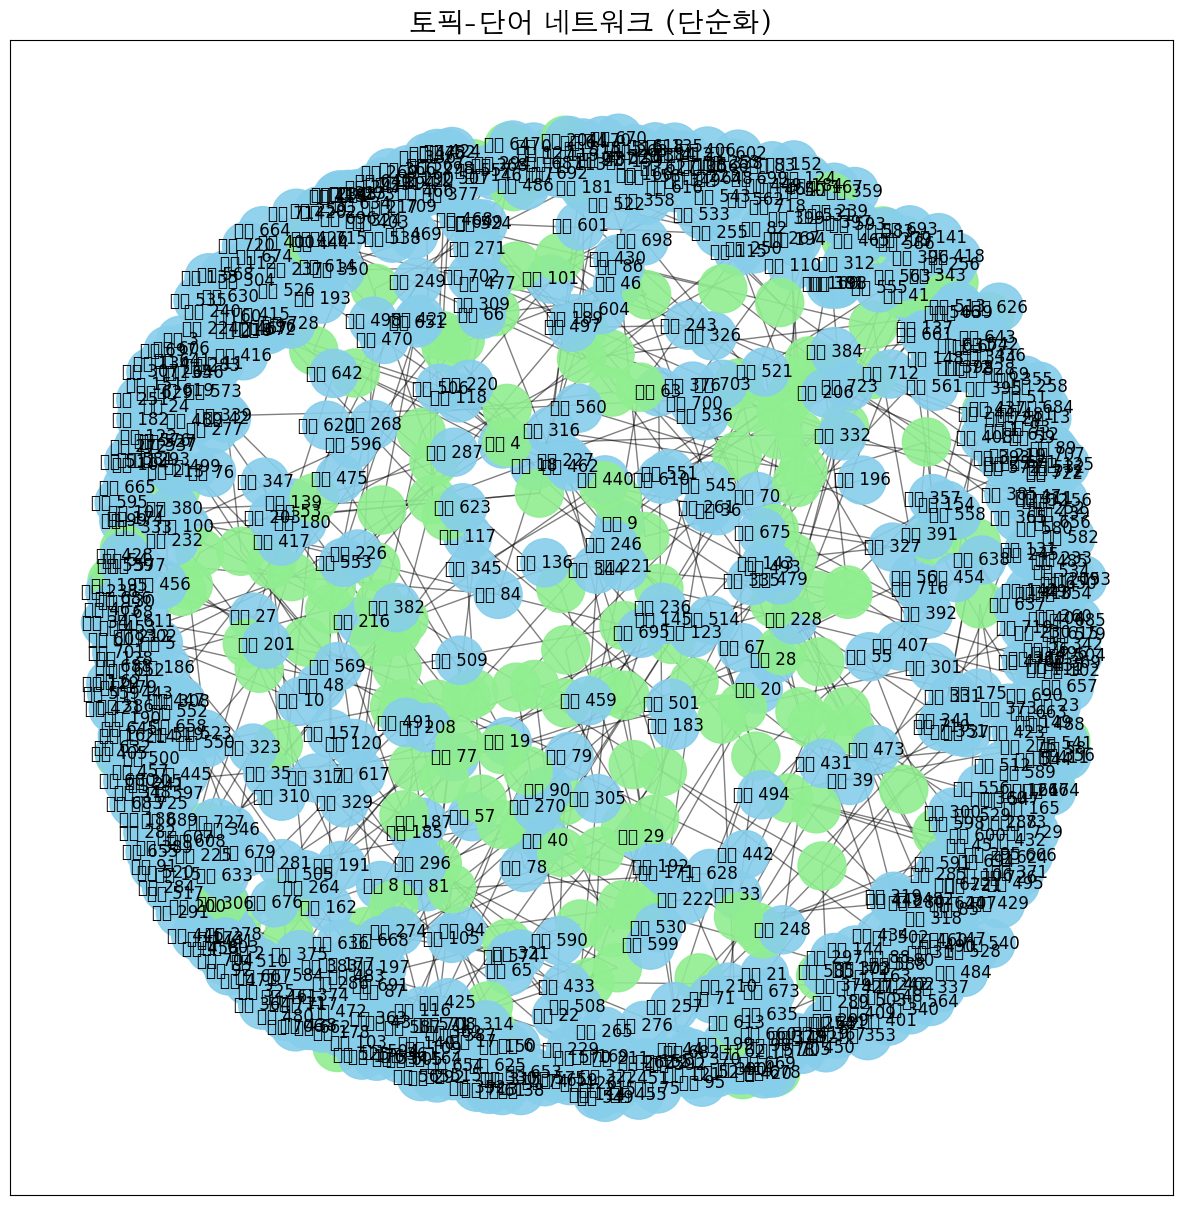

토픽 간 관계 시각화 저장 완료: /Users/gyungmin/VS_PRJ/DH/k-heritage/bertopic_topic_relationships.html


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from bertopic import BERTopic

# 한글 폰트 설정 (macOS의 AppleGothic 예시)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 파일 경로
file_path = '/Users/gyungmin/VS_PRJ/DH/k-heritage/cleaned_youtube_comments_with_stopwords.csv'

# 데이터 읽기
data = pd.read_csv(file_path)
comments = data['cleaned_comment'].dropna().tolist()

# BERTopic 모델 생성 및 토픽 학습
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(comments)

# 토픽 정보 가져오기
topic_info = topic_model.get_topic_info()

# 네트워크 생성
G = nx.Graph()

# 토픽-단어 관계 추가 (토픽당 상위 3개 단어만 추가)
for topic_id, topic_name in topic_info[['Topic', 'Name']].values:
    if topic_id == -1:
        continue  # 아웃라이어 제외
    words = topic_name.split('_')[1:4]  # 상위 3개 단어만 추출
    G.add_node(f"토픽 {topic_id}", type="topic")  # 토픽 노드 추가
    for word in words:
        G.add_node(word, type="word")  # 단어 노드 추가
        G.add_edge(f"토픽 {topic_id}", word)  # 토픽과 단어 간 연결

# 그래프 간소화: 연결 강도가 낮은 노드 제거
low_degree_nodes = [node for node, degree in G.degree() if degree <= 1]
G.remove_nodes_from(low_degree_nodes)

# 라벨 필터링 (현재 그래프에 존재하는 노드만 포함)
labels = {node: node if G.nodes[node]["type"] == "topic" else "" for node in G.nodes}

# 네트워크 시각화
plt.figure(figsize=(15, 15))  # 그래프 크기 설정
pos = nx.spring_layout(G, seed=42, k=0.3)  # k 값으로 간격 조절
node_colors = ["skyblue" if G.nodes[node]["type"] == "topic" else "lightgreen" for node in G.nodes]

# 노드와 엣지 그리기
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)  # 토픽 노드만 라벨 표시

plt.title("토픽-단어 네트워크 (단순화)", fontsize=20)
plt.show()

# 토픽 간 관계 시각화 (HTML 저장)
visualization_path = "/Users/gyungmin/VS_PRJ/DH/k-heritage/bertopic_topic_relationships.html"
topic_model.visualize_topics().write_html(visualization_path)
print(f"토픽 간 관계 시각화 저장 완료: {visualization_path}")